# Time series data structures & Time-based indexing

# Part 1

Inspiration from: 
https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

The data set includes country-wide totals of electricity consumption, wind and solar power production for 2006-2017, Germany.


In [1]:
import pandas as pd
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv', index_col=0, parse_dates=True)
print("Shape:",opsd_daily.shape)
opsd_daily.head(3)
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

Shape: (4383, 4)


Notice that the index is already in datetime format! :-) So we can add a few columns easily

In [2]:
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.weekday_name


For example, we can also select data for a single day using a string such as '2017-08-10'

In [3]:
opsd_daily.loc['2017-08-10']

Consumption      1351.49
Wind             100.274
Solar              71.16
Wind+Solar       171.434
Year                2017
Month                  8
Weekday Name    Thursday
Name: 2017-08-10 00:00:00, dtype: object

We can also select a slice of days, such as '2014-01-20':'2014-01-22'. As with regular label-based indexing with loc, the slice is inclusive of both endpoints.

In [4]:
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


Another very handy feature of pandas time series is partial-string indexing, where we can select all date/times which partially match a given string. For example, we can select the entire year 2006 with opsd_daily.loc['2006'], or the entire month of February 2012 with opsd_daily.loc['2012-02'].

In [5]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,Monday
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,Tuesday
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,Wednesday
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,Thursday


An interesting question in this dataset is how much of the generated green energy was sufficient for the overall consumption. Create two new columns, one called "gap" (consumption-green energy production) and one called ratio (green energy production/consumption).

In [6]:
opsd_daily['gap']=opsd_daily['Consumption']-opsd_daily['Wind+Solar']
opsd_daily['ratio']=opsd_daily['Wind+Solar']/opsd_daily['Consumption']

In this notebook, we're interested in this supply-demand relationship (i.e. production vs consumption), and you may have noticed that the first years have no production reported (they are NANs). Remove all NANs from the dataset.

In [7]:
opsd_daily=opsd_daily.dropna()

# Visualizing time series data

In [8]:
# We’ll use seaborn styling for our plots, and let’s adjust the 
# default figure size to an appropriate shape for time series plots.
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 5)})

Create a line plot of the full time series of Germany’s daily electricity consumption, using the DataFrame’s plot() method.

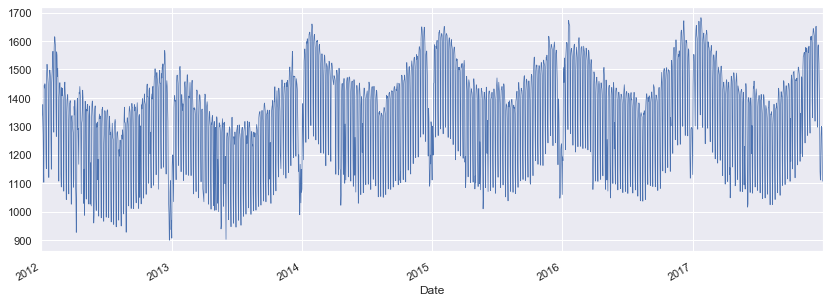

In [9]:
opsd_daily['Consumption'].plot(linewidth=0.7);

We can see that the plot() method has chosen pretty good tick locations (every two years) and labels (the years) for the x-axis, which is helpful. However, with so many data points, the line plot is crowded and hard to read. Let’s plot the data as dots instead, and also look at the Solar and Wind time series.

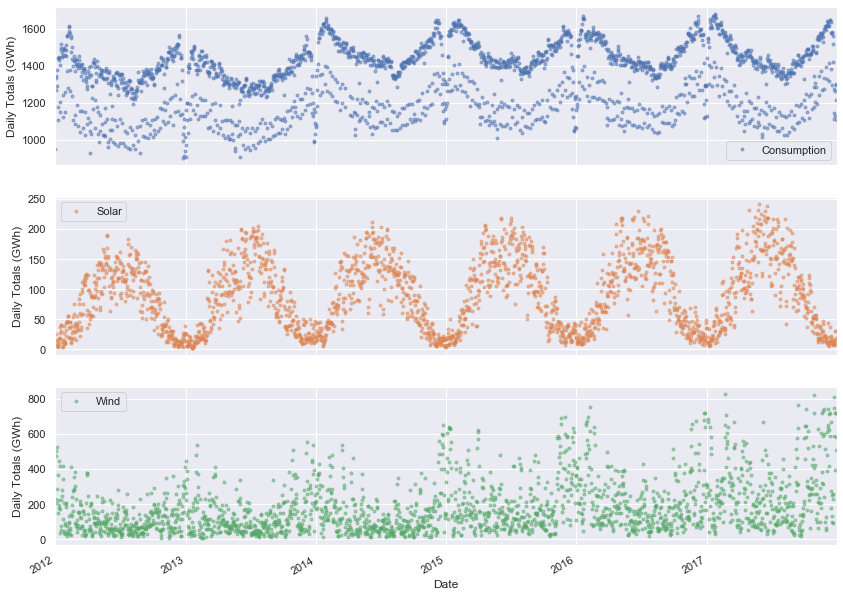

In [10]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14, 11), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

Can you see any interesting pattern?

    Electricity consumption is highest in winter, presumably due to electric heating and increased lighting usage, and lowest in summer.
    Electricity consumption appears to split into two clusters — one with oscillations centered roughly around 1400 GWh, and another with fewer and more scattered data points, centered roughly around 1150 GWh. We might guess that these clusters correspond with weekdays and weekends, and we will investigate this further shortly.
    Solar power production is highest in summer, when sunlight is most abundant, and lowest in winter.
    Wind power production is highest in winter, presumably due to stronger winds and more frequent storms, and lowest in summer.
    There appears to be a strong increasing trend in wind power production over the years.
    
    
    Do you see other patterns worth mentioning? :-)


Do you want to check the supply-demand gap and ratios you did before?

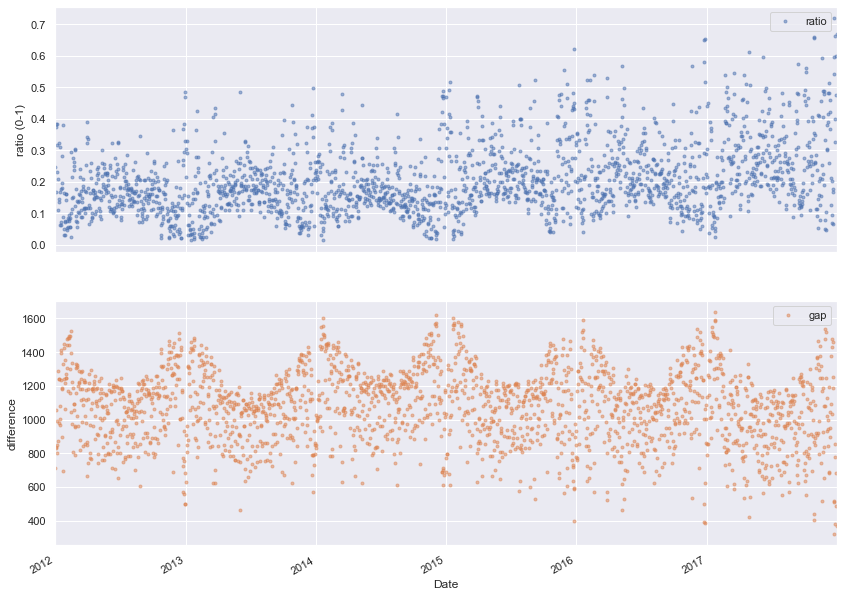

In [11]:
cols_plot = ['ratio', 'gap']
ylabels=['ratio (0-1)', 'difference']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14, 11), subplots=True)
for ax, ylab in zip(axes, ylabels):
    ax.set_ylabel(ylab)


All time series clearly exhibit periodicity—often referred to as seasonality in time series analysis—in which a pattern repeats again and again at regular time intervals. Seasonality can also occur on other time scales. The Consumption plot above suggests there may be some weekly seasonality, corresponding with weekdays and weekends. Let’s plot the time series in a single year to investigate further.

In [15]:
pd.__version__

'0.25.1'

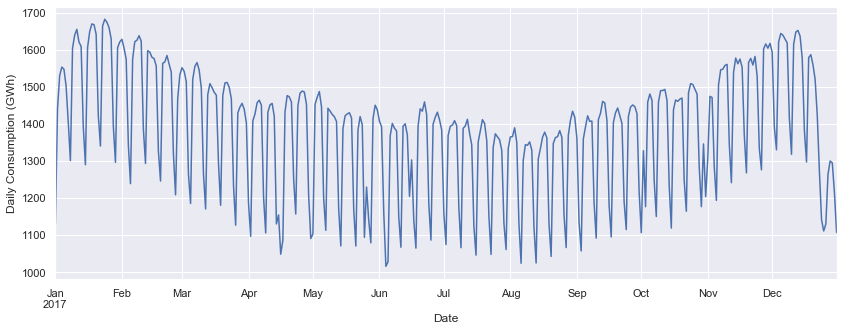

In [350]:
ax = opsd_daily.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

Now we can clearly see the weekly oscillations. Another interesting feature that becomes apparent at this level of granularity is the drastic decrease in electricity consumption in early January and late December, during the holidays.

Let’s zoom in further and look at just January and February.

In [351]:
weekends=opsd_daily.loc['2017-01':'2017-02', 'Consumption'].index.weekday>=5

In [352]:
colors=['blue' if x else 'red' for x in weekends]

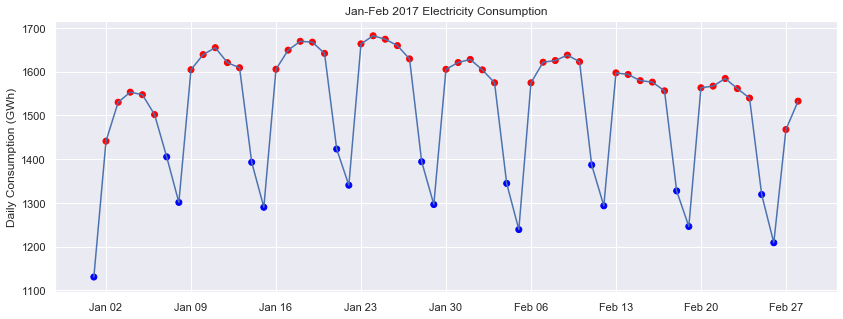

In [353]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'])
ax.scatter(opsd_daily.loc['2017-01':'2017-02'].index, opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-', c=colors)
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')

# To better visualize the weekly seasonality in electricity consumption 
# we add vertical gridlines on a weekly time scale

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

What do you see? To see the different effect of weekdays and weekends, color them differently in the graph (edit the code above to have red for normal days, and blue for weekends)

    Consumption is highest on weekdays and lowest on weekends.

# Stationarity

You can see visually that we're facing a non-stationary signal.

In [354]:
from statsmodels.tsa.stattools import adfuller

In [366]:

result = adfuller(opsd_daily['Solar'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
   print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.545094
p-value: 0.104884
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Create a new column, called "diff", that has the difference between consecutive values (diff[t=1]=Solar[t=1]-Solar[t=0])
 

In [16]:
opsd_daily['diff']=[0]+(np.array(opsd_daily['Solar'].to_list()[1:])-np.array(opsd_daily['Solar'].to_list()[:-1])).tolist()

In [17]:
opsd_daily['diff_trivial']=opsd_daily['Solar'].diff()

Re-run the AD Fuller test on this signal

In [368]:

result = adfuller(opsd_daily['diff'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
   print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.123517
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Plot this new signal (ONLY for a single month, say January and Februar 2017, otherwise you won't see much...)

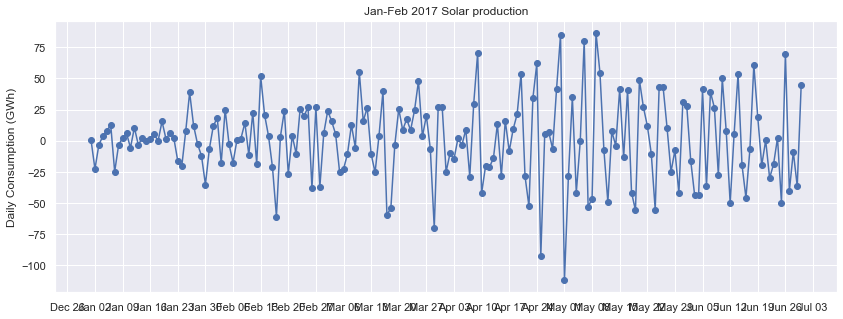

In [369]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-06', 'diff'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Solar production')

# To better visualize the weekly seasonality in electricity consumption 
# we add vertical gridlines on a weekly time scale

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

# Part 2 - Seasonality

Next, let’s further explore the seasonality of our data with box plots, using seaborn’s boxplot() function to group the data by different time periods and display the distributions for each group. We’ll first group the data by month, to visualize yearly seasonality.

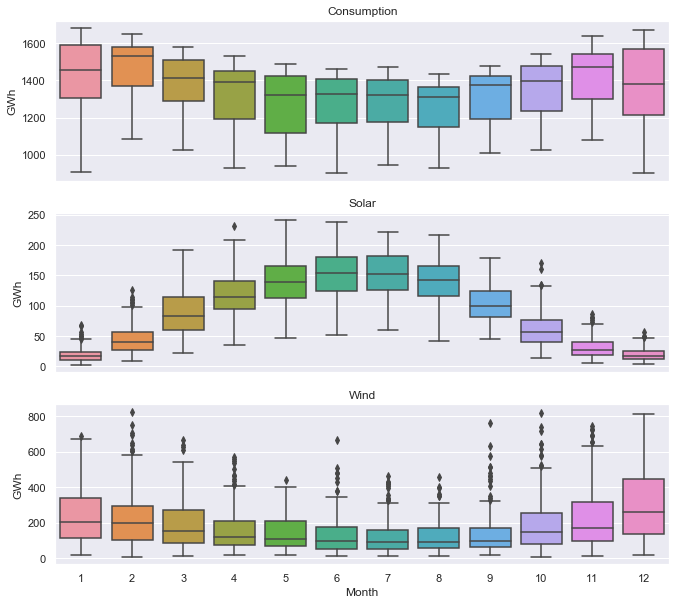

In [319]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

These box plots confirm the yearly seasonality that we saw in earlier plots. Can you notice something more?

    Although electricity consumption is generally higher in winter and lower in summer, the median and lower two quartiles are lower in December and January compared to November and February, likely due to businesses being closed over the holidays. We saw this in the time series for the year 2017, and the box plot confirms that this is consistent pattern throughout the years.
    While solar and wind power production both exhibit a yearly seasonality, the wind power distributions have many more outliers, reflecting the effects of occasional extreme wind speeds associated with storms and other transient weather conditions.

Next, let’s group the electricity consumption time series by day of the week, to explore weekly seasonality.

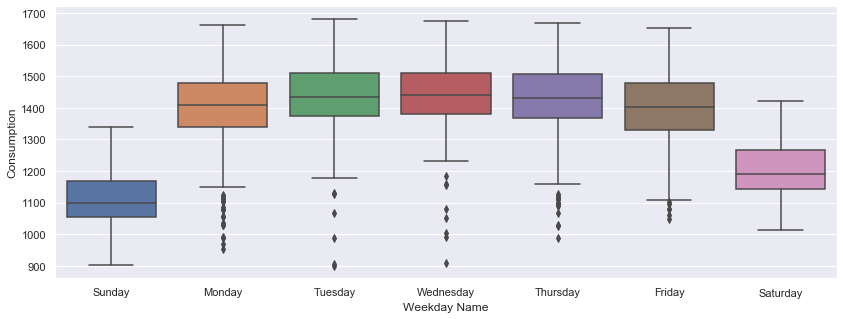

In [320]:
sns.boxplot(data=opsd_daily, x='Weekday Name', y='Consumption');

As expected, electricity consumption is significantly higher on weekdays than on weekends. Can you think about a reason of the outliyers during the weekdays?

    The low outliers on weekdays are presumably during holidays.

Time series with strong seasonality can often be well represented with models that decompose the signal into seasonality and a long-term trend, and these models can be used to forecast future values of the time series.

#  Resampling

It is often useful to resample our time series data to a lower or higher frequency. Resampling to a lower frequency (downsampling) usually involves an aggregation operation — for example, computing monthly sales totals from daily data. Resampling to a higher frequency (upsampling) is less common and often involves interpolation or other data filling method or filling the gaps in a dataset with missing data — for example, interpolating hourly weather data to 10 minute intervals for input to a scientific model.

We will focus here on downsampling, exploring how it can help us analyze our OPSD data on various time scales. We use the DataFrame’s resample() method, which splits the DatetimeIndex into time bins and groups the data by time bin. The resample() method returns a Resampler object, similar to a pandas GroupBy object. We can then apply an aggregation method such as mean(), median(), sum(), etc., to the data group for each time bin.

In [321]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'gap', 'diff']
# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean[:3]

,Consumption,Wind,Solar,Wind+Solar,gap,diff
Date,,,,,,
2012-01-01,948.128000,227.465000,6.587000,234.052000,714.076000,0.000000
2012-01-08,1271.200857,368.550571,10.960000,379.510571,891.690286,22.179286
2012-01-15,1361.100714,227.979571,19.160286,247.139857,1113.960857,6.791000


The first row above, labelled 2006-01-01, contains the mean of all the data contained in the time bin 2006-01-01 through 2006-01-07. The second row, labelled 2006-01-08, contains the mean data for the 2006-01-08 through 2006-01-14 time bin, and so on. By default, each row of the downsampled time series is labelled with the left edge of the time bin.

Let’s plot the daily and weekly Solar time series together over a single six-month period to compare them.

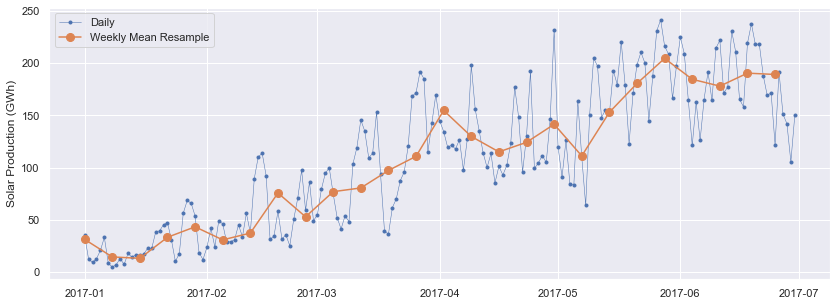

In [322]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

You should see that the weekly mean time series is smoother than the daily time series because higher frequency variability has been averaged out in the resampling.

Now let’s resample the data to monthly frequency, aggregating with sum totals instead of the mean. Unlike aggregating with mean(), which sets the output to NaN for any period with all missing data, the default behavior of sum() will return output of 0 as the sum of missing data. We use the min_count parameter to change this behavior.

Now let’s explore the monthly time series by 

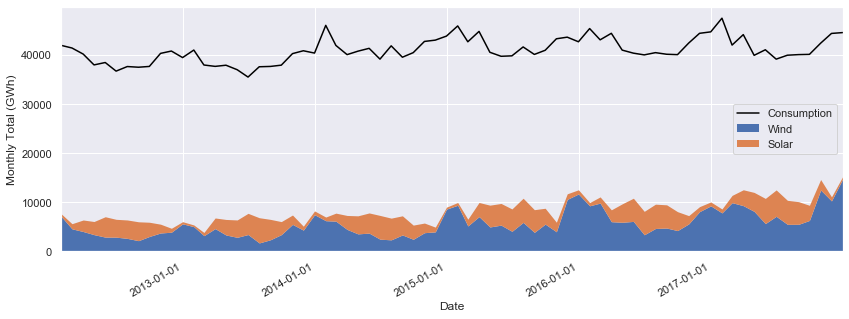

In [323]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data
opsd_monthly = opsd_daily[data_columns].resample('M').sum(min_count=28)

# plotting the electricity consumption as a line plot, 
# and the wind and solar power production together as a stacked area plot.

fig, ax = plt.subplots()
ax.plot(opsd_monthly['Consumption'], color='black', label='Consumption')
opsd_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');

Can you resample the ratio of Wind+Solar to Consumption to each year?

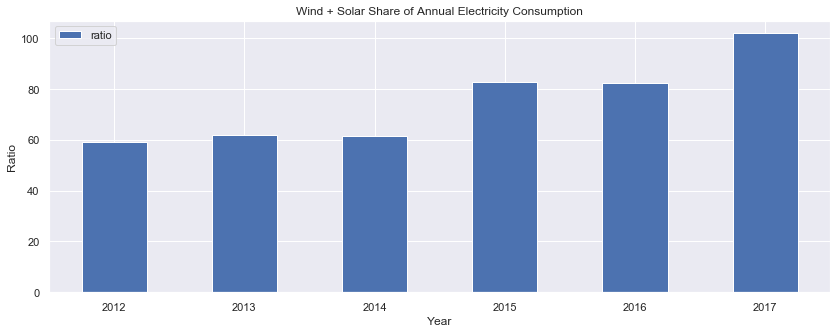

In [324]:
    
    opsd_annual = opsd_daily[['ratio']].resample('A').sum(min_count=360)
   
    opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
    opsd_annual.index.name = 'Year'
   
    # Plot from 2012 onwards, because there is no solar production data in earlier years
    ax = opsd_annual.plot.bar()
    ax.set_ylabel('Ratio')
    ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
    plt.xticks(rotation=0);

# Rolling windows

Rolling window operations are another important transformation for time series data. Similar to downsampling, rolling windows split the data into time windows, and the data in each window is aggregated with a function such as mean(), median(), sum(), etc. However, unlike downsampling, where the time bins do not overlap and the output is at a lower frequency than the input, rolling windows overlap and “roll” along at the same frequency as the data, so the transformed time series is at the same frequency as the original time series. 

When we apply the mean() to the rolling window, it is also called "moving average".

Let’s use the rolling() method to compute the 7-day rolling mean of our daily data. We use the center=True argument to label each window at its midpoint.

In [325]:
# Compute the centered 7-day rolling mean
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar,gap,diff
Date,,,,,,
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,1249.021571,369.495429,10.695286,380.190714,868.830857,32.508571
2012-01-05,1271.200857,368.550571,10.960000,379.510571,891.690286,22.179286
2012-01-06,1296.028000,360.623429,10.772857,371.396286,924.631714,24.827143
2012-01-07,1310.297429,318.127286,9.794000,327.921286,982.376143,14.269429
2012-01-08,1324.959143,274.931571,9.246571,284.178143,1040.781000,14.661714
2012-01-09,1334.357714,263.856714,11.096857,274.953571,1059.404143,9.398571


We can see that the first non-missing moving average value is on 2006-01-04, because this is the midpoint of the first rolling window.

To visualize the differences between moving average and resampling, let’s update our earlier plot of January-June 2017 solar power production to include the 7-day rolling mean along with the weekly mean resampled time series and the original daily data.

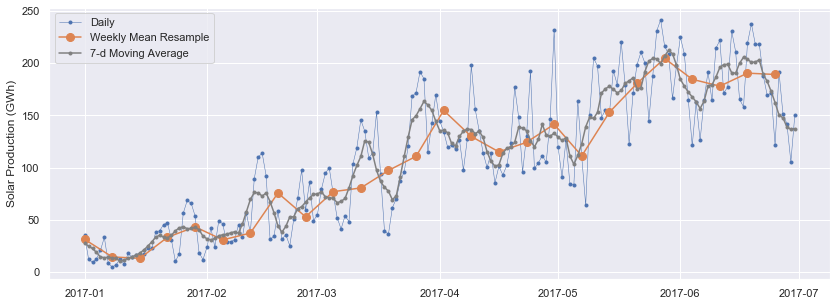

In [326]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily, weekly resampled, and 7-day moving average time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(opsd_7d.loc[start:end, 'Solar'],
marker='.', linestyle='-', label='7-d Moving Average', color="grey")
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

What do you see?

    We can see that data points in the moving average time series have the same spacing as the daily data, but the curve is smoother because higher frequency variability has been averaged out. In the moving average time series, the peaks and troughs tend to align closely with the peaks and troughs of the daily time series. In contrast, the peaks and troughs in the weekly resampled time series are less closely aligned with the daily time series, since the resampled time series is at a coarser granularity.

# Trends

Time series data often exhibit some slow, gradual variability in addition to higher frequency variability such as seasonality and noise. An easy way to visualize these trends is with moving averages at different time scales.

A moving average transformation tends to smooth a time series by averaging out variations at frequencies much higher than the window size and averaging out any seasonality on a time scale equal to the window size. This allows lower-frequency variations in the data to be explored. Since our electricity consumption time series has weekly and yearly seasonality, let’s look at moving averages on those two time scales.

We’ve already computed 7-day rolling means, so now let’s compute the 365-day rolling mean of our OPSD data.

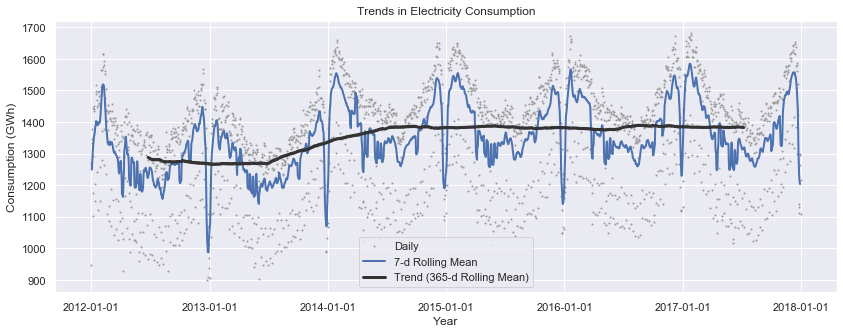

In [327]:
# The min_periods=360 argument accounts for a few isolated missing days in the
# wind and solar production time series
opsd_365d = opsd_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()

# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(opsd_daily['Consumption'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(opsd_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(opsd_365d['Consumption'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');

We can see that the 7-day moving average has smoothed out all the weekly seasonality, while preserving the yearly seasonality. The 7-day moving average reveals that while electricity consumption is typically higher in winter and lower in summer, there is a dramatic decrease for a few weeks every winter at the end of December and beginning of January, during the holidays.

Looking at the 365-day moving average time series, we can see that the long-term trend in electricity consumption is seems to move in plateaus, first until 2013, then 2014 onwards.

Now let’s look at trends in wind and solar production.

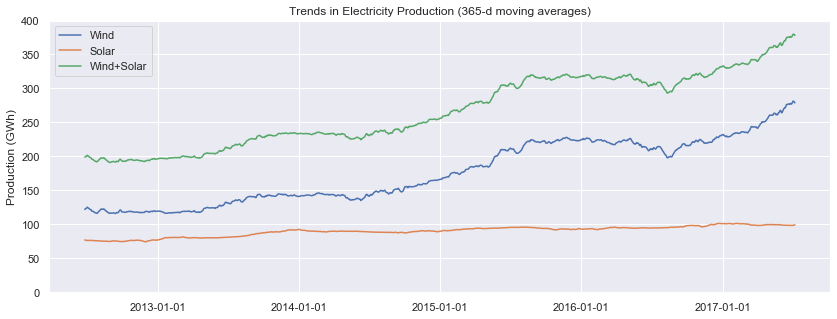

In [328]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d moving averages)');

We can see an almost negligible increasing trend in solar power production and a large increasing trend in wind power production, as Germany continues to expand its capacity in that sector.

# Autocorrelation

Let's now investigate the autocorrelations in our dataset. As usual, there are nice Python packages for this:

In [333]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


Now plotting ACF and PACF is really trivial:

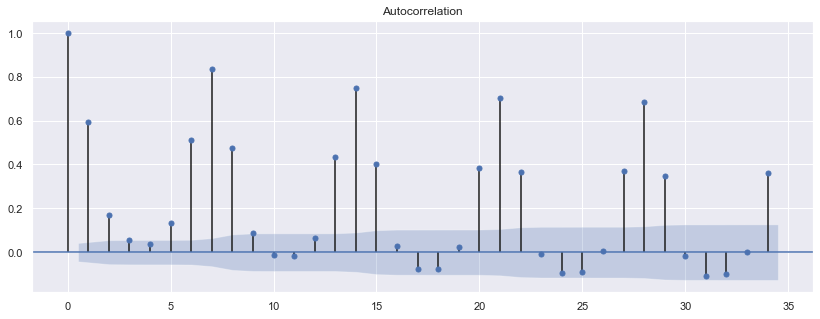

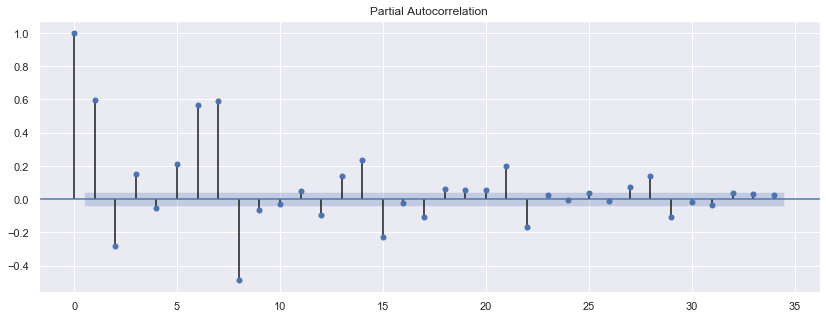

In [338]:
plot_acf(opsd_daily['Consumption'])
plot_pacf(opsd_daily['Consumption']);

What does this tell you? Later on you'll see that this is useful to decide the orders of MA and AR components of your model